# Implementation of Pandiyan et al.

#### Group: Julia Zhong, Aidan Boyne, Jacob John, Exequiel Nuño

For a brief intro to the ode solvers, see the [scipy documentation](https://docs.scipy.org/doc/scipy/tutorial/integrate.html#ordinary-differential-equations-solve-ivp) and [additional resources](https://pundit.pratt.duke.edu/wiki/Python:Ordinary_Differential_Equations/Examples).

### ODEs
---
(1)   $\;\; \frac{dx}{dt} = s(t) - \frac{(k_1z)x}{k_a+x}-k_2x$<br><br>
(2)   $\;\; \frac{dy}{dt} = \frac{(k_3z)w}{k_d+w}-k_4y$<br><br>
(3)   $\;\; \frac{dz}{dt} = k_5\left(\frac{w}{z}-N\right)-k_6zx$<br><br>
(4)   $\;\; \frac{dw}{dt} = k_7 - \frac{k_7x}{k_b+x}-k_8w$<br><br>

### State Variables
- $x(t)$ = `x[0]` the amount of MMI (mg) per liter of blood serum at time t.
- $y(t)$ = `x[1]` the amount of FT4 (pg) per milliliter of blood serum at time t.
- $z(t)$ = `x[2]` the functional size of thyroid gland (mL) or the volume of proportion of active
cells at time $t$.
- $w(t)$ = `x[3]` the amount of TRAb (U) per milliliter of blood serum at time t.
- $s(t)$ = `x[4]` the amount of MMI orally taken per day per liter of body volume (mg/L/day)

### Parameters
| Parameter | Description                                     | Value    | Units           | Parameter No. |
|-----------|-------------------------------------------------|----------|-----------------|---------------|
| $k_1$     | Relative maximum uptake rate of MMI             | 8.374e-3 | mg/(mL*day)     | `p[0]`        |
| $k_2$     | Elimination rate of MMI                         | 3.3271   | 1/day           | `p[1]`        |
| $k_3$     | Relative maximum FT4 secretion rate             | 0.119    | pg/($mL^2$*day) | `p[2]`        |
| $k_4$     | FT4 elimination rate                            | 0.099021 | 1/day           | `p[3]`        |
| $k_5$     | Relative growth rate of FTS                     | 1e6      | $mL^3$/(U*day)  | `p[4]`        |
| $k_6$     | Thyroid inactivation rate constant              | 0.001    | mL/(mg*day)     | `p[5]`        |
| $k_7$     | Maximal TRAb prodction rate                     | 0.875    | U/(mL*day)      | `p[6]`        |
| $k_8$     | Elimination rate of TRAb                        | 0.035    | 1/day           | `p[7]`        |
| $k_a$     | MM constant for half maximal MMI uptake rate    | 0.358068 | mg/L            | `p[8]`        |
| $k_b$     | Inhibition rate of TRAb                         | 1.5      | mg/L            | `p[9]`        |
| $k_d$     | MM constant for half maximal FT4 secretion rate | 0.05     | U/mL            | `p[10]`       |
| N         | Maximal growth ratio                            | 0.833    | U/$mL^2$        | `p[11]`       |


---
# 1. Reimplement the ODE model in paper (W7).

In [1]:
# Imports
import numpy as np
from scipy.integrate import odeint
from scipy.optimize import least_squares
from matplotlib import pyplot as plt
from thyrohelpers import plot_thyroid, initialize_pandiyan, dose_sim, use_odeint
import pandas as pd
import os
import sys
import openpyxl
from IPython.display import HTML

In [2]:
p = initialize_pandiyan()

In [3]:
# Define times, compute solutions for figures 3-8
MMI_dose = lambda mg, ndays: (0.93 * mg * ndays)/59.71

# Fig 3
ndays_F3 = 10
days_F3 = np.linspace(0, 10, 100)
E0_F3 = [0,36,30,25,MMI_dose(0,ndays_F3)] # [x,y,z,w,s]
sol_F3 = use_odeint(E0_F3, days_F3, p)
# Fig 4
ndays_F4 = 1
E0_F4 = (10,36,30,25,MMI_dose(0,ndays_F4)) # check pg 11 in paper
days_F4 =  np.linspace(0, 1, 100)
sol_F4 = use_odeint(E0_F4, days_F4, p)
# Fig 5
ndays_F5 = 25
E0_F5 = (10,36,30,25,MMI_dose(30,ndays_F5))
days_F5 = np.linspace(0, ndays_F5, 100)
sol_F5 = use_odeint(E0_F5, days_F5, p)
# Fig 6
ndays_F6 = 90
E0_F6 = (10,36,30,25,MMI_dose(30,ndays_F6))
days_F6 = np.linspace(0, ndays_F6, 100)
sol_F6 = use_odeint(E0_F6, days_F6, p)
# Fig 7
ndays_F7 = 40
E0_F7 = (10,36,30,25,MMI_dose(30, ndays_F7))
days_F7 = np.linspace(0, ndays_F7, 100)
sol_F7 = use_odeint(E0_F7, days_F7, p)
# Fig 8
ndays_F8 = 60
E0_F8 = (10,36,30,25,MMI_dose(30, ndays_F8))
days_F8 = np.linspace(0, ndays_F8, 100)
sol_F8 = use_odeint(E0_F8, days_F8, p)


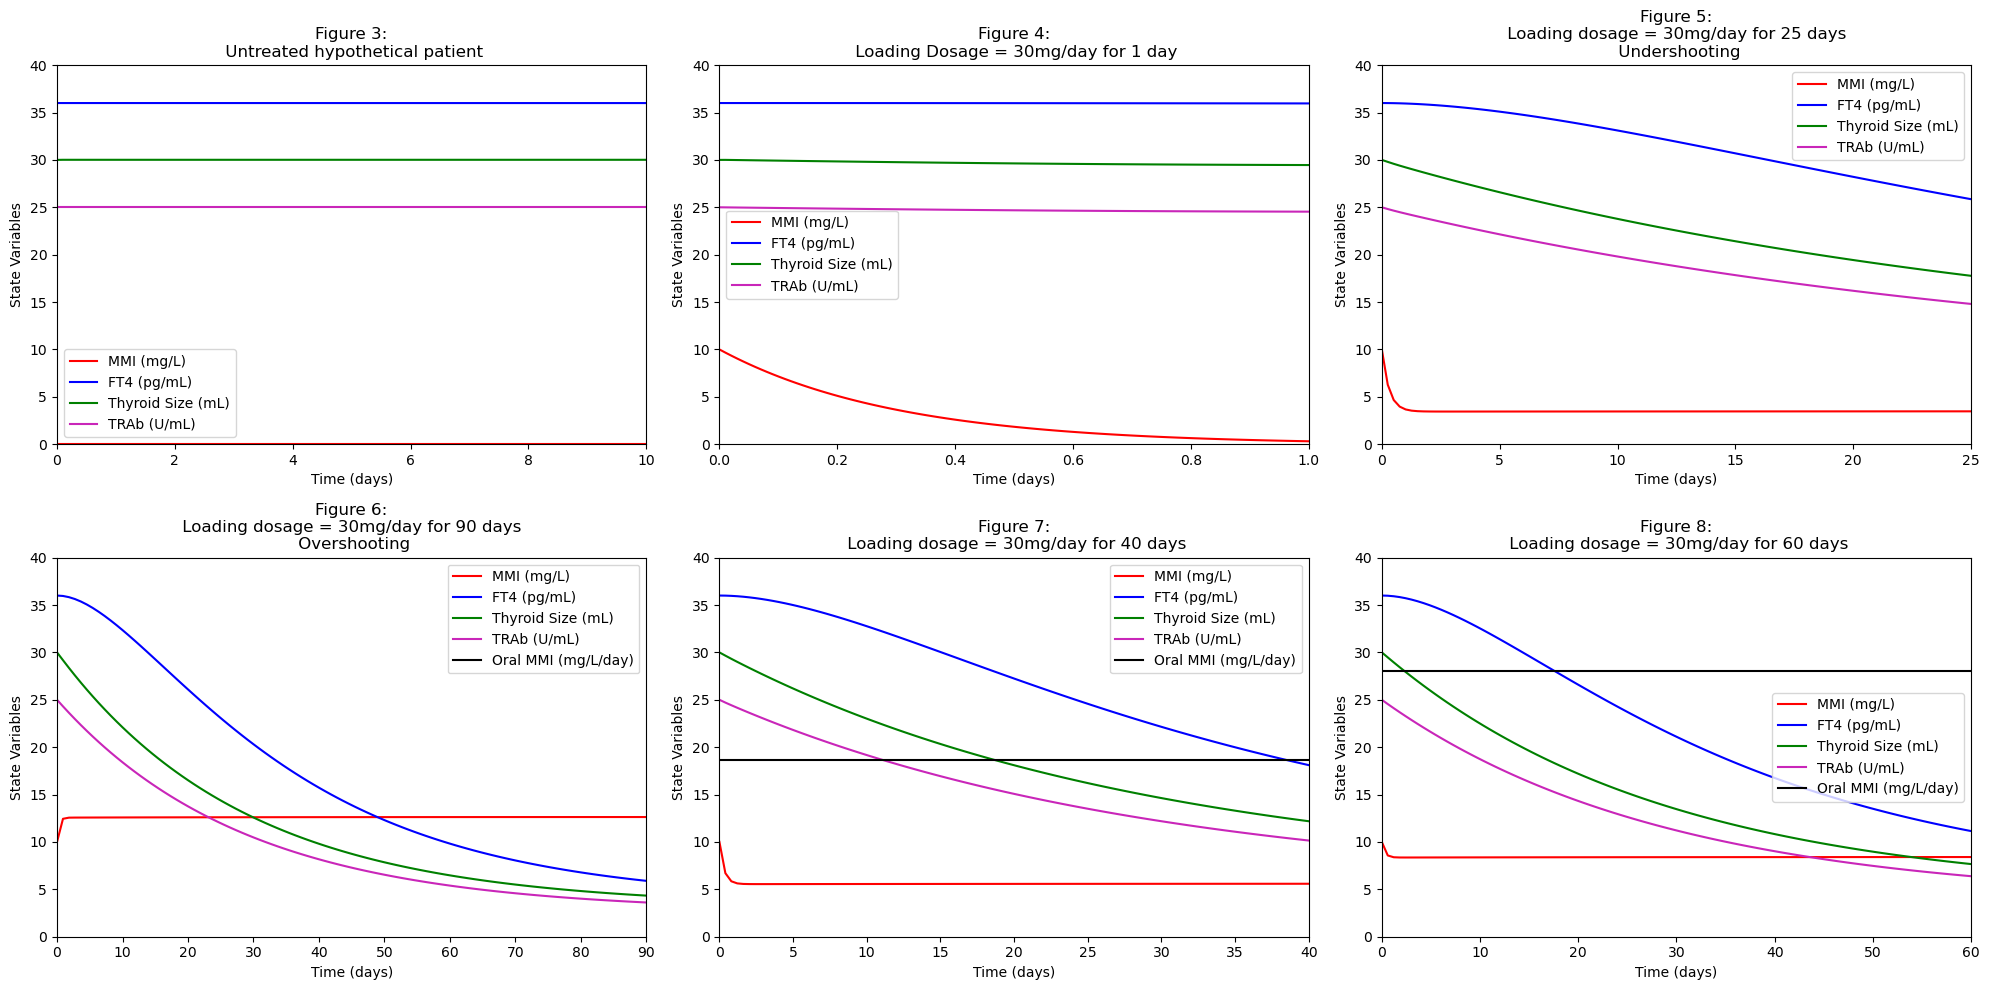

In [4]:
# Plot figures 3-8
plt.figure(figsize=(20,10))
plt.subplot(2,3,1)
plot_thyroid(days_F3,sol_F3,lims=[40,ndays_F3],title = "Figure 3:\n Untreated hypothetical patient", Methimazole=False, subs = True)
plt.subplot(2,3,2)
plot_thyroid(days_F4,sol_F4, lims=[40,ndays_F4], title = f"Figure 4:\n Loading Dosage = 30mg/day for {ndays_F4} day", Methimazole=False, subs = True)
plt.subplot(2,3,3)
plot_thyroid(days_F5,sol_F5, lims=[40,ndays_F5], title = f"Figure 5:\n Loading dosage = 30mg/day for {ndays_F5} days \n Undershooting", Methimazole=False, subs = True)
plt.subplot(2,3,4)
plot_thyroid(days_F6,sol_F6, lims=[40,ndays_F6], title = f"Figure 6:\n Loading dosage = 30mg/day for {ndays_F6} days \n Overshooting", Methimazole=True, subs = True)
plt.subplot(2,3,5)
plot_thyroid(days_F7,sol_F7, lims=[40,ndays_F7], title = f"Figure 7:\n Loading dosage = 30mg/day for {ndays_F7} days", Methimazole=True, subs = True)
plt.subplot(2,3,6)
plot_thyroid(days_F8,sol_F8, lims=[40,ndays_F8], title = f"Figure 8:\n Loading dosage = 30mg/day for {ndays_F8} days", Methimazole=True, subs = True)
plt.tight_layout()
plt.show()

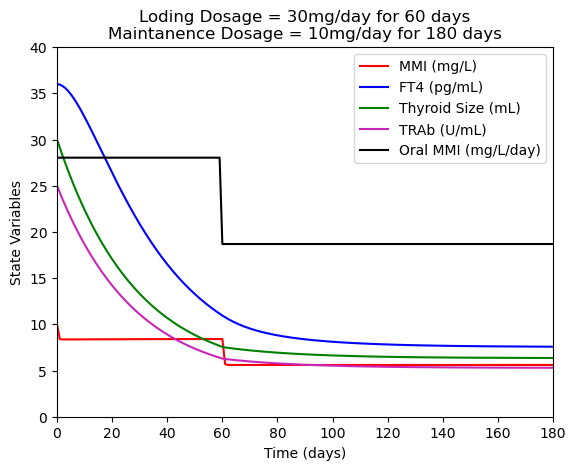

In [6]:
# NOTE: there is an off by 1 error somewhere in dose_sim causing small jumps, need to fix this

E_0 = (10,36,30,25,(0.93 * 30 * 60)/59.71) #need to fix maunual part of this
dose = [[30,10],[60,180]]
sol = dose_sim(E_0, p, dose)
plot_thyroid(np.linspace(0,dose[1][-1], dose[1][-1]+1),sol,lims=[40,dose[1][-1]],
             title = f"Loding Dosage = {dose[0][0]}mg/day for {dose[1][0]} days\n"
             f"Maintanence Dosage = {dose[0][1]}mg/day for {dose[1][1]} days",
             Methimazole=True, subs = True)

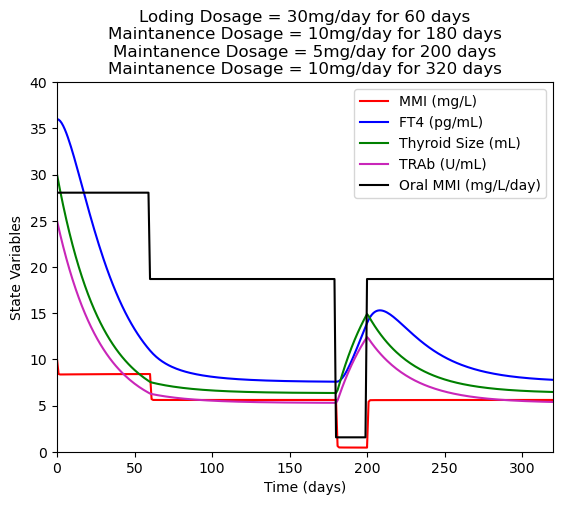

In [7]:
# NOTE: there is an off by 1 error somewhere in dose_sim causing small jumps, need to fix this

E_0 = (10,36,30,25,(0.93 * 30 * 60)/59.71) #need to fix maunual part of this
dose = [[30,10,5,10],[60,180,200,320]]
sol = dose_sim(E_0, p, dose)
plot_thyroid(np.linspace(0,dose[1][-1], dose[1][-1]+1),sol,lims=[40,dose[1][-1]],
             title = (f"Loding Dosage = {dose[0][0]}mg/day for {dose[1][0]} days\n"
                      f"Maintanence Dosage = {dose[0][1]}mg/day for {dose[1][1]} days\n"
                      f"Maintanence Dosage = {dose[0][2]}mg/day for {dose[1][2]} days\n"
                      f"Maintanence Dosage = {dose[0][3]}mg/day for {dose[1][3]} days"),
             Methimazole=True, subs = True)

---
# 2. Fit parameters using the author-provided data and compare to given parameters (W7-W8).

In [ ]:
patient20 = os.path.join("patient_data", "patient 20.xlsx")
patient31 = os.path.join("patient_data", "patient 31.xlsx")
patient55 = os.path.join("patient_data", "patient 55.xlsx")
patient70 = os.path.join("patient_data", "patient 70.xlsx")

# make sure to install openpyxl package!
df20 = pd.read_excel(patient20)
df31 = pd.read_excel(patient31)
df55 = pd.read_excel(patient55)
df70 = pd.read_excel(patient70)

In [ ]:
# patient 20
HTML(df20.to_html(index=False))

Time(days),FT4 (pg/mL),TRAb(U/mL)
0,25.63,7.5
90,17.70,NaN
180,13.81,NaN
360,13.14,0.7
570,12.46,0.6
780,12.76,0.6


In [ ]:
# filling missing values from patient 20 by using interpolate()
# warning do not change the value of inplace
new_df20 = df20.interpolate(method="polynomial", limit_direction="forward", order=3, inplace=False)
HTML(new_df20.to_html(index=False))

Time(days),FT4 (pg/mL),TRAb(U/mL)
0,25.63,7.50
90,17.70,3.56
180,13.81,1.49
360,13.14,0.70
570,12.46,0.60
780,12.76,0.60


In [ ]:
# converting the excel list to an array
# this can tell you the nanme of the columns of excel sheet
df20_1_col = new_df20.head(0)
print(df20_1_col)

# covnerting a specific Dataframe column to list by using .tolist()
time_list20 = new_df20["Time(days)"].tolist()
FT4_list20 = new_df20["FT4 (pg/mL)"].tolist()
TRTAB_list20 = new_df20["TRAb(U/mL)"].tolist()
print(time_list20, FT4_list20, TRTAB_list20)

Empty DataFrame
Columns: [Time(days), FT4 (pg/mL), TRAb(U/mL)]
Index: []
[0, 90, 180, 360, 570, 780] [25.63, 17.7, 13.81, 13.14, 12.46, 12.76] [7.5, 3.5599999999999996, 1.4900000000000002, 0.7, 0.6, 0.6]


In [ ]:
# patient 31
HTML(df31.to_html(index=False))

Time(days),FT4 (pg/mL),TRAb(U/mL)
0,26.43,1.74
90,20.43,NaN
870,11.50,0.45
1350,11.36,0.43


In [ ]:
# warnign do not change the value of inplace
new_df31 = df31.interpolate(method="polynomial", limit_direction="forward", order=2, inplace=False)
HTML(new_df31.to_html(index=False))

Time(days),FT4 (pg/mL),TRAb(U/mL)
0,26.43,1.740000
90,20.43,0.886667
870,11.50,0.450000
1350,11.36,0.430000


In [ ]:
# converting the excel list to an array
# this can tell you the nanme of the columns of excel sheet
df31_1_col = new_df31.head(0)
print(df31_1_col)

# covnerting a specific Dataframe column to list by using .tolist()
time_list31 = new_df31["Time(days)"].tolist()
FT4_list31 = new_df31["FT4 (pg/mL)"].tolist()
TRTAB_list31 = new_df31["TRAb(U/mL)"].tolist()
print(time_list31, FT4_list31, TRTAB_list31)

Empty DataFrame
Columns: [Time(days), FT4 (pg/mL), TRAb(U/mL)]
Index: []
[0, 90, 870, 1350] [26.43, 20.43, 11.5, 11.36] [1.74, 0.8866666666666667, 0.45, 0.43]


In [ ]:
# patient 55
HTML(df55.to_html(index=False))

Time(days),FT4 (pg/mL),TRAb(U/mL)
0,27.01,6.22
90,10.03,NaN
390,8.99,1.17
1080,40.28,2.47
1170,12.40,NaN
1320,10.79,NaN
1650,11.36,0.70


In [ ]:
# warnign do not change the value of inplace
new_df55 = df55.interpolate(method="polynomial", limit_direction="forward", order=2, inplace=False)
HTML(new_df55.to_html(index=False))

Time(days),FT4 (pg/mL),TRAb(U/mL)
0,27.01,6.220000
90,10.03,2.249512
390,8.99,1.170000
1080,40.28,2.470000
1170,12.40,3.080732
1320,10.79,2.490732
1650,11.36,0.700000


In [ ]:
# converting the excel list to an array
# this can tell you the nanme of the columns of excel sheet
df55_1_col = new_df55.head(0)
print(df55_1_col)

# covnerting a specific Dataframe column to list by using .tolist()
time_list55 = new_df55["Time(days)"].tolist()
FT4_list55 = new_df55["FT4 (pg/mL)"].tolist()
TRTAB_list55 = new_df55["TRAb(U/mL)"].tolist()
print(time_list55, FT4_list55, TRTAB_list55)

Empty DataFrame
Columns: [Time(days), FT4 (pg/mL), TRAb(U/mL)]
Index: []
[0, 90, 390, 1080, 1170, 1320, 1650] [27.01, 10.03, 8.99, 40.28, 12.4, 10.79, 11.36] [6.22, 2.249512195121951, 1.17, 2.47, 3.080731707317074, 2.490731707317073, 0.7]


In [ ]:
# patient 70
HTML(df70.to_html(index=False))

Time(days),FT4 (pg/mL),TRAb(U/mL)
0,35.40,8.80
180,9.38,1.30
300,8.97,1.40
360,31.22,4.70
540,9.87,0.90
720,9.87,0.30
1830,9.79,0.05


In [ ]:
# converting the excel list to an array
# this can tell you the name of the columns of excel sheet
df70_1_col = df70.head(0)
print(df70_1_col)

# converting a specific Dataframe column to list by using .tolist()
time_list70 = df70["Time(days)"].tolist()
FT4_list70 = df70["FT4 (pg/mL)"].tolist()
TRAb_list70 = df70["TRAb(U/mL)"].tolist()
print(time_list70, FT4_list70, TRAb_list70)

Empty DataFrame
Columns: [Time(days), FT4 (pg/mL), TRAb(U/mL)]
Index: []
[0, 180, 300, 360, 540, 720, 1830] [35.4, 9.38, 8.97, 31.22, 9.87, 9.87, 9.79] [8.8, 1.3, 1.4, 4.7, 0.9, 0.3, 0.05]


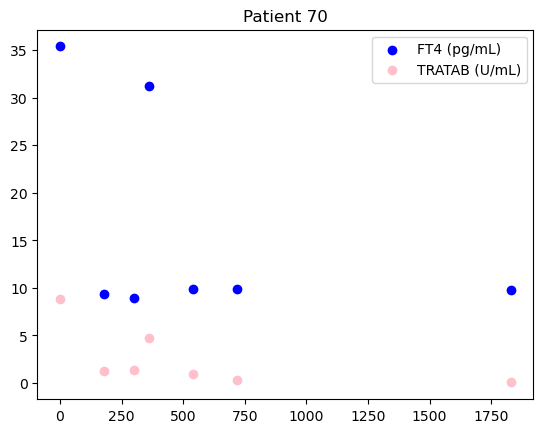

In [ ]:
plt.figure()
plt.scatter(time_list70, FT4_list70, label="FT4 (pg/mL)", color="b")
plt.scatter(time_list70, TRAb_list70, label="TRATAB (U/mL)", color="#FFC0CB")
plt.title("Patient 70")
plt.legend()


## project will entail four main steps:

    1. Reimplement the ODE model in paper (W7).
    2. Fit parameters using the author-provided data and compare to given parameters (W7-W8).
        Note: The values of k3 , kd , N, k7 and kb varies among patients
    3. Perform PLSR on the initial patient timepoints (X - data matrix) and the resulting parameter values (Y - outcomes), (W9). 
    4. Plug predicted parameters into the ODE system and compare performance to the actual fitted parameters (W9).
        For each of these steps, we will split the workload between groups of two to ensure that steady progress is made. 

## TODO for next time:
- Nan fixed
- continue part 2

In [ ]:
# TODO: didn't end up making any changes to thyroid_sim, remove this later
def thyroid_sim2(x, t, k1, k2, k3, k4, k5, k6, k7, k8, ka, kb, kd, N):
    """Takes x vector and passes it through one step of differentials."""
    dxdt = dx(t,x[0],x[2],x[4],k1,k2,ka)
    dydt = dy(t,x[1],x[2],x[3],k3,k4,kd)
    dzdt = dz(t,x[0],x[2],x[3],k5,k6,N)
    dwdt = dw(t,x[0],x[3],k7,k8,kb)
    dsdt = 0 # no MMI treatment
    x = np.array([dxdt,dydt,dzdt,dwdt,dsdt])

    return x

def use_odeint2(x, t, not_fixed, fixed):
    k3, k7, kb, kd, N = not_fixed
    k1, k2, k4, k5, k6, k8, ka = fixed
    return odeint(thyroid_sim2, x, t, args=(k1, k2, k3, k4, k5, k6, k7, k8, ka, kb, kd, N))

In [ ]:
# NOTE: changed custom initializations (i.e. initialize_patient70 to subroutines within
# initialize_pandiyan(patient=...))

fixed_p70, params_p70 = initialize_pandiyan(patient=70)
print(fixed_p70) # fixed parameters
print(params_p70) # parameters varying per patient (not_fixed)

TypeError: initialize_pandiyan() got an unexpected keyword argument 'patient'

In [ ]:
# params = initial guesses for [k3, k7, kb, kd, N]
def compute_residuals70(params, time_points, E_0, fixed, FT4_data, TRAb_data):

    # to store ode solution values at data time points
    fuckin_ode_soln = np.array((6, 5))

    # what the fuck. the dates and dosages on paper pg.20 and provided data are SUPER NOT LINED UP
    # use time based on the paper... since that's what we have dosage info on...
    
    # dosage in mg/day, time point in days, approx 1 month as 30 days
    dose1_pat70, days1_pat70 = 30, 30
    dose2_pat70, days2_pat70 = 25, days1_pat70 + 30
    dose3_pat70, days3_pat70 = 20, days2_pat70 + 30
    dose4_pat70, days4_pat70 = 15, days3_pat70 + 30
    dose5_pat70, days5_pat70 = 10, days4_pat70 + 30
    dose6_pat70, days6_pat70 = 5, days5_pat70 + 30 * 12 # 5 mg/day for months 6 - 17 inclusive
    
    # after these 17 months, MMI treatment was stopped for six months, and then continued again
    
    sc_dose1_pat70, sc_days1_pat70 = 20, 30 #sc = second course of MMI treatment - next 7 months
    sc_dose2_pat70, sc_days2_pat70 = 10, sc_days1_pat70 + 30 * 3
    sc_dose3_pat70, sc_days3_pat70 = 5, sc_days2_pat70 + 30 * 3
    #after these next 7 months, MMI treatment continued
    sc_dose4_pat70, sc_days4_pat70 = 5, sc_days3_pat70 + 30 * 6 #stopped treatment after these 6 months
    
    

    sol_p70_1 = use_odeint2(E_0, np.linspace(0, days1_pat70, days1_pat70 + 1), params, fixed) 
    E_0_1 = sol_p70_1[-1,:] # ending values for first 30 days
    E_0_1[-1] = MMI_dose(dose2_pat70, days2_pat70 - days1_pat70)
    sol_p70_2 =  use_odeint2(E_0_1, np.linspace(days1_pat70 + 1, days2_pat70, days1_pat70), params, fixed) # the patient takes 1 pill less the next time-point
    E_0_2 = sol_p70_2[-1,:] # ending values after 30 + 30 total days
    E_0_2[-1] = MMI_dose(dose3_pat70, days3_pat70 - days2_pat70)
    sol_p70_3 =  use_odeint2(E_0_2, np.linspace(days2_pat70 + 1, days3_pat70, days1_pat70), params, fixed)
    E_0_3 = sol_p70_3[-1,:] 
    E_0_3[-1] = MMI_dose(dose4_pat70, days4_pat70 - days3_pat70)
    sol_p70_4 =  use_odeint2(E_0_3, np.linspace(days3_pat70 + 1, days4_pat70, days1_pat70), params, fixed)
    E_0_4 = sol_p70_4[-1,:] 
    E_0_4[-1] = MMI_dose(dose5_pat70, days5_pat70 - days4_pat70)
    sol_p70_5 =  use_odeint2(E_0_4, np.linspace(days4_pat70 + 1, days5_pat70, days1_pat70), params, fixed)
    E_0_5 = sol_p70_5[-1,:] 
    E_0_5[-1] = MMI_dose(dose6_pat70, days6_pat70 - days5_pat70)
    sol_p70_6 =  use_odeint2(E_0_5, np.linspace(days5_pat70 + 1, days6_pat70, days6_pat70 - days5_pat70), params, fixed)

    # this models up to the end of 17 months 
    # TODO: continue from pg 20 to include the next 6 mos, then 7 mos, then 6 mos
    # TODO: store ode solution time points (check pg 20) into fuckin_ode_soln
    # TODO: cry
    
    # T4_residuals = FT4_data - fuckin_ode_soln[:,1]
    # TRAb_residuals = TRAb_data - fuckin_ode_soln[:,3]

    # return [T4_residuals, TRAb_residuals]

    return np.array([sol_p70_1, sol_p70_2, sol_p70_3, sol_p70_4, sol_p70_5, sol_p70_6])

In [ ]:
# TODO: what the fuck we can't find body volumes. continue to use average man 59.71L

# dosage in mg/day, time point in days
# approx 1 month as 30 days
dose1_pat70, days1_pat70 = 30, 30
E_0_70 = [30/3,35.04,30,8.8,MMI_dose(dose1_pat70, days1_pat70)] # [x,y,z,w,s]

# TODO: complete compute_residuals70 first, then uncomment this
# lsq70 = least_squares(compute_residuals70, imgunnastabyou[1], args=[time_list70, E_0_70, imgunnastabyou[0], FT4_list70, TRAb_list70])

In [ ]:
time_points = np.linspace(0, 510, 511)
compute_residuals70(params_p70, time_points, E_0_70, fixed_p70, FT4_list70, TRAb_list70)

NameError: name 'params_p70' is not defined